# Sistemas de Segundo Orden.

## Caracterización de la respuesta temporal al escalón de un sistema subamortiguado 

La importancia de definir parámetros temporales de un sistema subamortiguado al escalón, se debe a que muchas plantas o procesos físicos, sus dinámicas, son aproximadas a esta función de transferencia. Por lo que este modelado simplificado permite conocer características de la estabilidad y de la naturaleza de la respuestas del régimen transitorio. Adicionalmente, no sólo permite analizar o predecir el comportamiento temporal, sino que, a veces, los requisitos de diseño de los reguladores de control, emplean definiciones dadas en este epígrafe, como por ejemplo el valor de sobreoscilación. Por todas estas razones, se trata de caracterizar mediante medidas de tiempo y de valor de pico, la salida de un sistema subamortiguado ante una excitación de escalón unitario. 

In [78]:
from sympy import *                                 # Se plantea la acuacion diferencial
from IPython.display import display, Math, Latex
init_printing(use_latex=True)
X, Y,S, s, wd, wn, z, t,tt, k = symbols("X, Y, S, \\sigma, \\omega_d, \\omega_n, \\zeta, t, \\theta, k")
s+wd-wn*z
e=exp(1)

Entender el sistema de segundo orden es muy importante para el diseño de controladores ya que
habitualmente la mayor parte de los sistemas pueden ser aproximados a un sistema de orden dos.
La función de transferencia de un sistema de segundo orden es: 

$$\frac{Y(s)}{X(s)}= \frac{\omega_n^2}{s^2 + 2\zeta \omega_ns + \omega_n^2}$$
Donde el término $\omega_n$ se denomina frecuencia natural y $\zeta$ es el coeficiente de amortiguamiento. Si
se consideran polos complejos conjugados (0 < $\zeta$ < 1), la respuesta en el tiempo para entrada
escalón es: 
$$ y(t)=1-\frac{1}{\sqrt{1-\zeta^2}}e^{-\zeta\omega_nt}sin\left [\omega_n\left (\sqrt{1-\zeta^2}\right )t+\theta\right ]$$

Donde el término $\zeta \omega_n $ es la parte real de los polos complejos y $\omega_n \sqrt{1 − \zeta } $ es la parte imaginaria.(El término $\omega_n \sqrt{1 − \zeta} $ también se denomina frecuencia natural amortiguada o $\omega_d$). Existen dos factores que determinan la forma y la velocidad de respuesta del sistema de segundo orden. Estos factores son la frecuencia natural $\omega_n $ y el coeficiente de amortiguamiento $\zeta$.
<img src="img/f2.png"/>

## 1. Calculo de las variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
d = pd.read_csv("data/sistemaorden2-1.txt", decimal=",", sep=';')
d.columns=[u'Tiempo',u'Amplitud']
d.shape

In [4]:
#d['Dates'] = d['Dates'].str.replace(',', '.')

In [5]:
#[float(i)  for i in d['Dates'].as_matrix()]


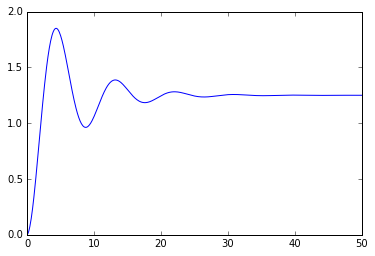

In [6]:
plt.plot(d["Tiempo"], d["Amplitud"])

### 1.1 El tiempo pico se halla de la siguiete forma
Es el tiempo requerido para que la respuesta alcance el primer pico de sobreimpulso. 

In [7]:
VM=d.Amplitud.max()
m=d.Amplitud.mean()

In [8]:
i=0
for c in d.Amplitud:
    i+=1
    if c==VM:
        cont=i                #contador
        tpn=d.Tiempo[i]
print 'El tiempo pico del sistema es tp =', tpn, '[s]'

El tiempo pico del sistema es tp = 4.4 [s]


### 1.2 El tiempo de crecimiento se calcula de la grafica como se muestra a continuación

Es el tiempo requerido para que la respuesta aumente de 0 a 100% para sistemas subamortiguados, del 5 al 95% o del 10 al 90% para sistemas críticamente amortiguados o sobreamortiguados. 

In [9]:
d1=d[0:cont]      # se Crea una lista con los primeros datos hasta el valor maximo que se encontro anteriormente

In [10]:
j=0
for c in d1.Amplitud:
    if c<= d.Amplitud[480]:
        j +=1
trn=d.Tiempo[j]
print 'El tiempo de crecimiento del sistema es tr =', trn, '[s]'

El tiempo de crecimiento del sistema es tr = 2.5 [s]


### 1.3 El cálculo del valor pico máximo se muestra a continuación.

Es el valor pico máximo de la curva de respuesta medido desde el valor de establecimeinto o valor deseado. El sobreimpulso máximo se obtiene de la respuesta evaluada en el tiempo pico, se da en valores porcentuales.

In [11]:
Mpn= (VM-d.Amplitud[480])/d.Amplitud[480]
print 'El valor máximo pico es de Mp =',Mpn*100,'%'

El valor máximo pico es de Mp = 47.9662931871 %


### 1.4 Tiempo de Establecimiento

Es el tiempo mínimo donde la curva de respuesta alcanza y se mantiene dentro de un rango de error preestablecido, generalmente es del  2% o del 5%, el rango más común es el del 2%. Para sistemas de primer y segundo orden, la respuesta se mantiene dentro del 2% después de 4 constantes de tiempo:

#### Procedimiento para invertir los datos y hacer un recorrido desde el último dato hacia atras

In [12]:
x=int(0)
while ((len(d)-1-x)>x):
    auxT=d.Tiempo[x]
    auxA=d.Amplitud[x]
    d.Tiempo[x]=d.Tiempo[len(d)-1-x]
    d.Amplitud[x]=d.Amplitud[len(d)-1-x]
    d.Tiempo[len(d)-1-x]=auxT
    d.Amplitud[len(d)-1-x]=auxA
    x +=1

In [13]:
k=0
vts=0.95*d.Amplitud[20]
for c in d.Amplitud:
    if c > vts:
        k +=1
    else:break
tsn=d.Tiempo[k]
print 'El tiempo de asentamiento del sistema es ts =', tsn, '[s]'

El tiempo de asentamiento del sistema es ts = 18.0 [s]


### 2 Con los datos obtenidos anteriormente y teniendo en cuenta la teoria de los sistemas de segundo orden, se tienen las siguientes relaciones:

In [14]:
print ('Tiempo pico')
display(Math(r'tp=\frac{\pi}{\omega_d}'))

Tiempo pico


<IPython.core.display.Math object>

In [15]:
print ('Valor pico máximo')
display(Math(r'Mp=e^{-\frac{\zeta \pi}{\sqrt{1-\zeta^2}}}'))

Valor pico máximo


<IPython.core.display.Math object>

In [16]:
print ('Tiempo de establecimiento')
display(Math(r't_s=4T=\frac{4}{\zeta \omega_n}=\frac{4}{\sigma}'))

Tiempo de establecimiento


<IPython.core.display.Math object>

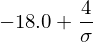

In [17]:
exprts = 4/s-tsn
exprts

In [18]:
sols=solve(exprts,s)
solsn=sols[0]                            #Debido a que el resultado esta en formato lista, extrae el valor.

In [19]:
exprMp=e**(-(s/wd)*pi)-Mpn
exprMp

In [20]:
exprMp.subs({s:solsn})

In [21]:
solwd=solve(exprMp,wd)
solwd=solwd[0]

In [22]:
solwdn=solwd.subs({s:solsn})
print 'La frecuencia natural amortiguada del sistema es',solwdn, '[rad/s]'

La frecuencia natural amortiguada del sistema es 0.950263568256059 [rad/s]


Con estos valores y deduciendo de las eciaciones dadas anteriormente se obtienen los valores para $\zeta$ y $\omega_n$, como se hace a continuación:

In [23]:
display(Math(r'\omega_n=\sqrt{\sigma^2+\omega_d^2}'))

<IPython.core.display.Math object>

In [24]:
solwnn=(sqrt(solsn**2+solwdn**2))
print 'La frecuencia natural del sistema es',solwnn, '[rad/s]'

La frecuencia natural del sistema es 0.975901411621133 [rad/s]


In [25]:
display(Math(r'\zeta=\frac{\sigma}{\omega_n}'))

<IPython.core.display.Math object>

In [26]:
solzn=solsn/solwnn
print 'El coeficiente de amortiguamiento del sistema es',solzn

El coeficiente de amortiguamiento del sistema es 0.227709704664813


In [27]:
solttn=atan2(sqrt(1-solzn**2),solzn)
print 'El angulo de desfase del sistema es',solttn, '[rad]'

El angulo de desfase del sistema es 1.34107138019242 [rad]


Con estos valores se puede escribir la solución al sistema planteado en el espacio de la frecuendia compleja S como se ve a continuación.

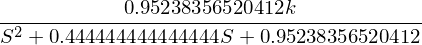

In [79]:
G=solwnn**2*k/(S**2+2*solzn*solwnn*S+solwnn**2)
G

Y la solucion del sistema en el tiempo se ve de la siguiente manera

In [82]:
y=1-1/(sqrt(1-solzn**2))*e**(-solzn*solwnn*t)*sin(solwnn*sqrt(1-solzn**2)*t+solttn)
y*k

In [86]:
y1=listofzeros = [0] * 500
kn=d.Amplitud[20]

In [87]:
t1=[x * 0.1 for x in range(0, 500)]

In [88]:
p=0
for c in t1:
    y1[p]=y.subs({t:c})*kn
    p +=1

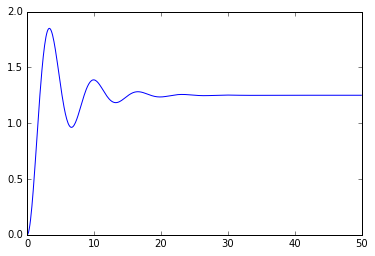

In [89]:
plt.plot(t1,y1)

Para comparar la señal obtenida con la dibujada por los datos extraidos del sistema, se hacen las dos gráficas en el mismo apartado

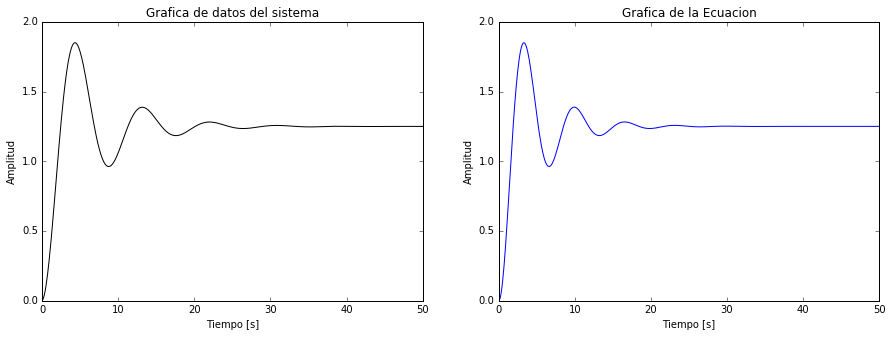

In [90]:
plt.figure(figsize=(15,5))
plt.ion()
plt.subplot(1,2,1)
plt.title('Grafica de datos del sistema')
plt.xlabel("Tiempo [s]")                     # Establece el título del eje x
plt.ylabel("Amplitud")                       # Establece el título del eje y
plt.plot(d['Tiempo'], d["Amplitud"],'k')
plt.subplot(1,2,2)
plt.title('Grafica de la Ecuacion')
plt.xlabel("Tiempo [s]")                     # Establece el título del eje x
plt.ylabel("Amplitud")                       # Establece el título del eje y
plt.plot(t1, y1)

Como vemos en las graficas, las dos tienen bastante parecido y por tanto, a partir de la ecuacion encontrada se puede generar la animación.

## 3. Animación